In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import MinMaxScaler,StandardScaler,Normalizer
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF

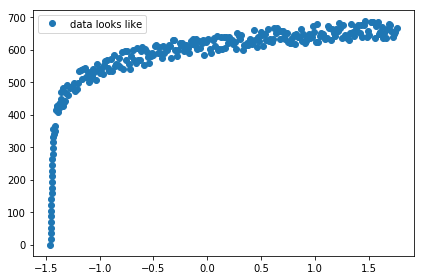

In [7]:
data = np.loadtxt("E:/nmtuan97/1_scripts/ml_learning/data_test.csv", delimiter=',')
X = data[:,:1]
y = data[:,1:2]

X = StandardScaler().fit_transform(X)

X_for_train,X_test,y_for_train,y_test = train_test_split(X,y,test_size = 0.2)

plt.plot(X, y, 'o', label='data looks like')
plt.legend()
plt.tight_layout()
plt.show()

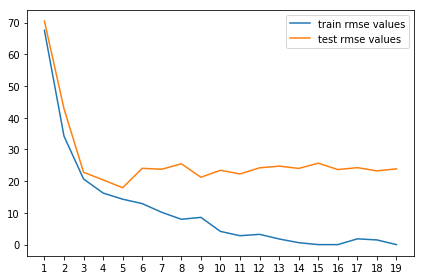

In [8]:
# find optimal parameter for model

# TRAINING ERROR PER DEGREE
train_rmse_errors = []
# TEST ERROR PER DEGREE
test_rmse_errors = []

max_depth_ = np.arange(1,20,1)

for d in max_depth_:
    X_train,X_cv,y_train,y_cv = train_test_split(X_for_train,y_for_train,test_size = 0.25)
    
    dt_reg = DecisionTreeRegressor(max_depth=d)
    dt_reg.fit(X_train, y_train)
    
    y_train_predicted_dt_ = dt_reg.predict(X_train)
    y_cv_dt_ = dt_reg.predict(X_cv)
    
    rmse_train_ = np.sqrt(mean_squared_error(y_train, y_train_predicted_dt_))
    rmse_cv_ = np.sqrt(mean_squared_error(y_cv, y_cv_dt_))
    
    train_rmse_errors.append(rmse_train_)
    test_rmse_errors.append(rmse_cv_)

default_x_ticks = range(len(max_depth_))   
plt.plot(default_x_ticks, train_rmse_errors, '-', label='train rmse values')
plt.plot(default_x_ticks, test_rmse_errors, '-', label='test rmse values')
plt.xticks(default_x_ticks, max_depth_)
plt.legend()
plt.tight_layout()
plt.show()

In [9]:
#train model using decision tree
r2_ = 0.98
r2_train_ = 0.0
r2_cv_ = 0.0
max_ = 0
while r2_cv_ < float(r2_):
    X_train,X_cv,y_train,y_cv = train_test_split(X_for_train,y_for_train,test_size = 0.25)
    
    dt_reg = DecisionTreeRegressor(max_depth=4)
    dt_reg.fit(X_train, y_train)
    
    y_train_predicted_dt_ = dt_reg.predict(X_train)
    y_cv_dt_ = dt_reg.predict(X_cv)
    
    rmse_train_ = np.sqrt(mean_squared_error(y_train, y_train_predicted_dt_))
    r2_train_ = r2_score(y_train, y_train_predicted_dt_)
    mae_train_ = mean_absolute_error(y_train, y_train_predicted_dt_)
    # Evaluating test dataset
    rmse_cv_ = np.sqrt(mean_squared_error(y_cv, y_cv_dt_))
    r2_cv_ = r2_score(y_cv, y_cv_dt_)
    mae_cv_ = mean_absolute_error(y_cv, y_cv_dt_)
    
    if r2_cv_ > max_:
        max_ = r2_cv_
        print("R2 score of test is {}".format(max_))
        
print("-------------------------------------------")
print("RMSE of training is {}".format(rmse_train_))
print("R2 score of training  is {}".format(r2_train_))
print("MAE of training is {}".format(mae_train_))
print("RMSE of test is {}".format(rmse_cv_))
print("R2 score of test is {}".format(max_))
print("MAE of test is {}".format(rmse_cv_))

R2 score of test is 0.9519312058180837
R2 score of test is 0.9798214481891334
R2 score of test is 0.980899925662666
-------------------------------------------
RMSE of training is 15.42446995425226
R2 score of training  is 0.9856829496438672
MAE of training is 12.715413624991893
RMSE of test is 17.809451302005435
R2 score of test is 0.980899925662666
MAE of test is 17.809451302005435


R2 score of test is: 0.991023801323794


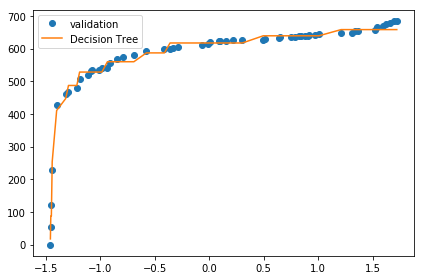

In [10]:
X_test = np.sort(X_test, axis=0)
y_test = np.sort(y_test, axis=0)

y_pred_dt = dt_reg.predict(X_test)

r2_dt = r2_score(y_test, y_pred_dt)
print(f'R2 score of test is: {r2_dt}')

plt.plot(X_test, y_test, 'o', label='validation')
plt.plot(X_test, y_pred_dt, '-', label='Decision Tree')
plt.legend()
plt.tight_layout()
plt.show()